In [3]:
!python -V

Python 3.8.13


In [1]:
import pandas as pd
print(pd.__version__)

1.4.1


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import missingno as msno
# from collections import Counter
# import nltk 
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# import re
# from sklearn.feature_extraction.text import CountVectorizer
# import sklearn.preprocessing as preprocessing
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')


# ## tensorflow imports
# import tensorflow as tf
# from tensorflow.keras import layers 
# from tensorflow.keras.regularizers import l2
# print(tf.__version__)

2.8.0


In [4]:
import os
# the current working directory.
currentDirectory = os.getcwd()
print(currentDirectory)

C:\Users\dey4d\CapstoneProj


In [5]:
file_in = r'C:\Users\dey4d\CapstoneProj\index_sec'
import pickle as pickle
with open(file_in, "rb") as fh:
    data2 = pickle.load(fh)

In [6]:
data2.head(2)

,CompanyCIK,CompanyName,FileType,FileDate,EdgarTextUrl,EdgarHtmlUrl,AccessionNumber,SecFileName,CompanyTicker,FileDate_ClosingPrice,FileDate_Plus_20,FileDate_Plus_20_Price,Pct_Change_20,Share_Unit_Value_Raw,FileName,f_text,file_text_length
FileDate,,,,,,,,,,,,,,,,,
2019-01-03,717954,UNIFIRST CORP,10-Q,2019-01-03,edgar/data/717954/0001284084-19-000002.txt,edgar/data/717954/0001284084-19-000002-index.html,0001284084-19-000002,2019-QTR1,UNF,133.860001,2019-01-23,136.509995,1.979676,2.649994,717954_0001284084-19-000002.txt,"[various estimate, the result, timely decision...",1870
2019-01-03,1084765,RESOURCES CONNECTION INC,10-Q,2019-01-03,edgar/data/1084765/0001193125-19-001543.txt,edgar/data/1084765/0001193125-19-001543-index....,0001193125-19-001543,2019-QTR1,RGP,13.600000,2019-01-23,16.590000,21.985292,2.990000,1084765_0001193125-19-001543.txt,"[asc topic contract term, limited number, the ...",2305


In [56]:
# data2.info()

In [7]:
## features besides text to be used in the model
df_non_text_features = data2.drop(columns = ['CompanyCIK','CompanyName','EdgarTextUrl','EdgarHtmlUrl','AccessionNumber','FileDate_Plus_20','FileDate_Plus_20_Price','Share_Unit_Value_Raw','FileName','f_text'])

In [8]:
df_non_text_features = df_non_text_features.reset_index(drop=True)
df_non_text_features.head(4)

,FileType,FileDate,SecFileName,CompanyTicker,FileDate_ClosingPrice,Pct_Change_20,file_text_length
0,10-Q,2019-01-03,2019-QTR1,UNF,133.860001,1.979676,1870
1,10-Q,2019-01-03,2019-QTR1,RGP,13.600000,21.985292,2305
2,10-Q,2019-01-03,2019-QTR1,SMPL,19.920000,-1.355424,1342
3,10-Q,2019-01-04,2019-QTR1,EBF,19.790001,0.303181,1475


In [9]:
## extracting the month only from file date
df_non_text_features['FileDate']=df_non_text_features.FileDate.astype('str')

FileDate = df_non_text_features['FileDate']

File_Mon = []

for pd in FileDate:
    mon = pd[5:7]
    File_Mon.append(mon)
    
# adding the confromed period month to the dataframe
df_non_text_features["File_Mon"] = File_Mon

In [10]:
## extracting the QTR only from SecFileName
df_non_text_features['SecFileName']=df_non_text_features.SecFileName.astype('str')

SecFileName = df_non_text_features['SecFileName']

QTR = []

for pd in SecFileName:
    qtr = pd[5:9]
    QTR.append(qtr)
    
# adding the confromed period month to the dataframe
df_non_text_features["QTR"] = QTR

In [11]:
# df_non_text_features.head(3)

In [12]:
### Converting Pct_Change_20  to boolean variable based on whether the change is exceeding 5%

per_change_exceeding = []

for index, row in df_non_text_features.iterrows():
    if row['Pct_Change_20'] > 5:     
          per_change_exceeding.append("True")
    else: 
        per_change_exceeding.append("False")
        
df_non_text_features["per_change_exceeding"] = per_change_exceeding

In [13]:
np.unique(per_change_exceeding)

array(['False', 'True'], dtype='<U5')

In [14]:
df_non_text_features.head(3)

,FileType,FileDate,SecFileName,CompanyTicker,FileDate_ClosingPrice,Pct_Change_20,file_text_length,File_Mon,QTR,per_change_exceeding
0,10-Q,2019-01-03,2019-QTR1,UNF,133.860001,1.979676,1870,01,QTR1,False
1,10-Q,2019-01-03,2019-QTR1,RGP,13.600000,21.985292,2305,01,QTR1,True
2,10-Q,2019-01-03,2019-QTR1,SMPL,19.920000,-1.355424,1342,01,QTR1,False


In [15]:
### Droping filedate, Secfilename and Pct_Change_20 from the dataframe
df_non_text_features = df_non_text_features.drop(columns = ['FileDate','SecFileName', 'Pct_Change_20'])

In [16]:
df_non_text_features.head(3)

,FileType,CompanyTicker,FileDate_ClosingPrice,file_text_length,File_Mon,QTR,per_change_exceeding
0,10-Q,UNF,133.860001,1870,01,QTR1,False
1,10-Q,RGP,13.600000,2305,01,QTR1,True
2,10-Q,SMPL,19.920000,1342,01,QTR1,False


In [17]:
## tf-idf vectorizer for ngram text

import pandas as pd

MAX_FEATURES = 20000 

def dummy_fun(doc):
    return doc

tfidvec = TfidfVectorizer(analyzer='word', 
                          tokenizer=dummy_fun,                      
                          preprocessor=dummy_fun,
                          token_pattern=None,
#                           max_features = MAX_FEATURES,
                          binary=True, 
                          smooth_idf=False,
                          max_df=0.75,     
                          min_df=0.1,       
#                           norm= 'l1',      ## increase the sparsity
                          stop_words= None,
                          strip_accents=None,
                          use_idf=True,
                          sublinear_tf=True)

df_tfidvec = tfidvec.fit_transform(data2["f_text"])

dfsp_tfidf = pd.DataFrame(df_tfidvec.toarray(), columns=tfidvec.get_feature_names_out())
print(dfsp_tfidf.head(3))
print('='*100)
print('Size of the tfidf Vector Matrix: ', dfsp_tfidf.shape)

   10k       10q    13a14a    15d14a  1a risk factor   8k  ability  \
0  0.0  0.000000  0.000000  0.000000        0.042414  0.0      0.0   
1  0.0  0.020066  0.031527  0.000000        0.036250  0.0      0.0   
2  0.0  0.027186  0.042713  0.049522        0.049111  0.0      0.0   

   absolute assurance  acceptable term  acceptance  ...  write notice  \
0            0.000000         0.000000         0.0  ...           0.0   
1            0.044935         0.039122         0.0  ...           0.0   
2            0.000000         0.000000         0.0  ...           0.0   

   writing      year  yes no indicate   you all  yous  yous dollar  yous gaap  \
0      0.0  0.000000         0.038051  0.000000   0.0     0.046716   0.042532   
1      0.0  0.021240         0.032521  0.037536   0.0     0.039927   0.000000   
2      0.0  0.028776         0.044060  0.000000   0.0     0.000000   0.000000   

      yousc  yousc section  
0  0.000000       0.028955  
1  0.029228       0.024746  
2  0.039598   

In [18]:
df_tfidvec

<45382x2146 sparse matrix of type '<class 'numpy.float64'>'
	with 23030207 stored elements in Compressed Sparse Row format>

In [19]:
##  final data frame 
import pandas as pd
df_final = pd.concat([df_non_text_features, dfsp_tfidf], axis=1, join='inner')

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45382 entries, 0 to 45381
Columns: 2153 entries, FileType to yousc section
dtypes: float64(2147), int64(1), object(5)
memory usage: 745.4+ MB


In [21]:
import pandas as pd
categorical_columns = ['FileType','CompanyTicker','File_Mon','QTR']

for column in categorical_columns:
#     print(column, ' ', df_final_2.dtypes[column])
    tempdf = pd.get_dummies(df_final[column], prefix=column)
    df_final = pd.merge(
        left=df_final,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_final = df_final.drop(columns=column)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45382 entries, 0 to 45381
Columns: 9045 entries, FileDate_ClosingPrice to QTR_QTR4
dtypes: float64(2147), int64(1), object(1), uint8(6896)
memory usage: 1.0+ GB


'Though not perfect, it is not unbalanced '

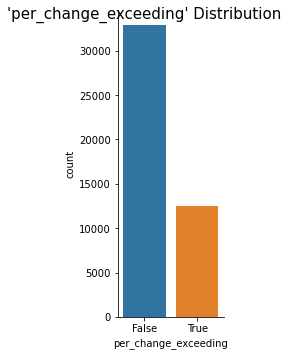

In [23]:
## ploting the distribution of response variable 
missbeat_plot = sns.catplot(x="per_change_exceeding", kind="count",data=df_final,height=5, aspect=.5)
missbeat_plot.fig.suptitle("'per_change_exceeding' Distribution",
                  fontsize=15, fontdict={"weight": "bold"})
'''Though not perfect, it is not unbalanced '''

In [127]:
### QR factorization to find the orthogonal columns to have a better conditioned matrix

## DROP the response variable 

# df_final_explantory = df_final.drop(columns = ['per_change_exceeding'])

# matrix = df_final_explantory.to_numpy()

# q, r = np.linalg.qr(matrix)

In [205]:
np.linalg.cond(df_final_explantory, p=None)

'''it is an ill-conditioned matrix; so we need to use orthogonal bases'''

8.830415632208509e+20

## Using SVD decomposition

In [153]:
## SVD
from numpy import dot, diag, exp, real, sin, cosh, tanh
from scipy.linalg import svd, svdvals

In [155]:
def omega_approx(beta):
    """Return an approximate omega value for given beta. Equation (5) from Gavish 2014."""
    return 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43

df_final_explantory = df_final.drop(columns = ['per_change_exceeding'])

# do SVD and find tau star hat
U,sv,Vh = svd(df_final_explantory, False, lapack_driver='gesvd')
beta = min(df_final_explantory.shape) / max(df_final_explantory.shape)
tau = np.median(sv) * omega_approx(beta)

In [156]:
rank = round(tau) + 1
print('Optimal Cutoff Ranks, after adjustment for rounding, for SVD as per Gavish and Donoho : ', rank) 

Optimal Cutoff Ranks, after adjustment for rounding, for SVD as per Gavish and Donoho :  6


In [181]:
### top 7 column bases represent most of the variation
percentage_of_variation = round((sum(np.diagonal(np.diag(sv[:7]))) / sum(np.diagonal(np.diag(sv))))*100 , 2)

print('percentage of variation represented by 7 column bases :', percentage_of_variation)

percentage of variation represented by 7 column bases : 98.53


In [159]:
## taking top columns to create lower dimension matrix
df_lower = U[:,:7] 
print('Size of the lower dimension matrix---')
print(df_lower.shape)

Size of the lower dimension matrix---
(45382, 7)


In [185]:
## weighting the column bases with the inverse of variation
# np.diag(sv[:7])
df_lower_new = U[:,:7] @ np.linalg.inv(np.diag(sv[:7]))
print('Size of the new lower dimension matrix---')
print(df_lower_new.shape)

Size of the new lower dimension matrix---
(45382, 7)


In [196]:
df_response = pd.DataFrame(per_change_exceeding, columns =['per_change_exceeding'])
df_response["per_change_exceeding"] = (df_response["per_change_exceeding"] == "True").astype(int)

print(df_response['per_change_exceeding'].value_counts())

0    32904
1    12478
Name: per_change_exceeding, dtype: int64


In [197]:
# y = df_final['per_change_exceeding']  ## this is explanatory variable

y = np.array(df_response) ## already seperated from the data and stored in the y variable. converting to array
X = df_lower_new
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (45382, 1)
Size of explanatory matrix:  (45382, 7)


In [198]:
## Since the data is somewhat unbalanced, I prefer to use StratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits= 5,shuffle=True,random_state=42)

for train, test in cv.split(X,y):
    X_train = X[train] 
    X_test  = X[test] 
    y_train = y[train]
    y_test  = y[test] 
    
print('Size of training data: ', len(X_train), 'and its shape : ', X_train.shape)
print('Size of training labels: ', len(y_train), 'and its shape : ', y_train.shape)
print('Size of test data: ', len(X_test), 'and its shape : ', X_test.shape)
print('Size of test labels: ', len(y_test), 'and its shape : ', y_test.shape)

Size of training data:  36306 and its shape :  (36306, 7)
Size of training labels:  36306 and its shape :  (36306, 1)
Size of test data:  9076 and its shape :  (9076, 7)
Size of test labels:  9076 and its shape :  (9076, 1)


## Dense Network

In [201]:
# defining the architecture of this connected neural network

def build_fc_model():    
    '''defining the model using the Sequential class'''
    fc_model = tf.keras.Sequential([
      # First define a input layer
      tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

      # Defining the activation function for the first fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        
      # Defining the activation function for the second fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),     

      # Defining the activation function for the third fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),   
        
      # Defining the second Dense layer to output the classification probabilities
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, activity_regularizer=tf.keras.regularizers.L2(0.01))       
    ])
    return fc_model

model = build_fc_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [202]:
## Using Adam optimizer with a learning rate of 0.01
## since it is categorical classification, we are opting for caterorical_crossentropy for sparse data
## chosing the matrix as accuracy

learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [203]:
# Defining the batch size and the number of epochs to use during training
BATCH_SIZE = 32
EPOCHS = 5

model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
1135/1135 [==============================] - 3s 2ms/step - loss: 1.5284 - accuracy: 0.7249
Epoch 2/5
1135/1135 [==============================] - 2s 1ms/step - loss: 0.6807 - accuracy: 0.7251
Epoch 3/5
1135/1135 [==============================] - 2s 1ms/step - loss: 0.5937 - accuracy: 0.7251
Epoch 4/5
1135/1135 [==============================] - 2s 1ms/step - loss: 0.5893 - accuracy: 0.7251
Epoch 5/5
1135/1135 [==============================] - 2s 1ms/step - loss: 0.5890 - accuracy: 0.7251


## Using QR decomposition 

In [24]:
### QR factorization to find the orthogonal columns to have a better conditioned matrix

df_final_explantory = df_final.drop(columns = ['per_change_exceeding'])
matrix = df_final_explantory.to_numpy()

q, r = np.linalg.qr(matrix)

In [25]:
### putting the column bases (q) into dataframe

column_bases = [f'col_{num}' for num in range(len(q))]
df_q_col_bases = pd.DataFrame(np.transpose(matrix), columns=column_bases)

df_q_col_bases.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_45372,col_45373,col_45374,col_45375,col_45376,col_45377,col_45378,col_45379,col_45380,col_45381
0,133.860001,13.6,19.92,19.790001,20.82,11.83,43.580002,75.580002,21.26,10.0,...,96.900002,2.95,460.059998,79.160004,85.870003,82.330002,61.799999,31.52,6.05,433.170013
1,1870.000000,2305.0,1342.00,1475.000000,1075.00,834.00,1024.000000,1692.000000,1664.00,1891.0,...,1491.000000,1916.00,2651.000000,2550.000000,1266.000000,1172.000000,1119.000000,880.00,1830.00,1671.000000
2,0.000000,0.0,0.00,0.000000,0.00,0.00,0.000000,0.057430,0.00,0.0,...,0.062368,0.00,0.000000,0.000000,0.067314,0.000000,0.000000,0.00,0.00,0.000000


In [26]:
## new dataframe with response variable

df_response = pd.DataFrame(per_change_exceeding, columns =['per_change_exceeding'])
df_response["per_change_exceeding"] = (df_response["per_change_exceeding"] == "True").astype(int)

df_final_col_bases = pd.concat([df_response, df_q_col_bases], axis=1, join='inner')
df_final_col_bases.head(3)    

,per_change_exceeding,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_45372,col_45373,col_45374,col_45375,col_45376,col_45377,col_45378,col_45379,col_45380,col_45381
0,0,133.860001,13.6,19.92,19.790001,20.82,11.83,43.580002,75.580002,21.26,...,96.900002,2.95,460.059998,79.160004,85.870003,82.330002,61.799999,31.52,6.05,433.170013
1,1,1870.000000,2305.0,1342.00,1475.000000,1075.00,834.00,1024.000000,1692.000000,1664.00,...,1491.000000,1916.00,2651.000000,2550.000000,1266.000000,1172.000000,1119.000000,880.00,1830.00,1671.000000
2,0,0.000000,0.0,0.00,0.000000,0.00,0.00,0.000000,0.057430,0.00,...,0.062368,0.00,0.000000,0.000000,0.067314,0.000000,0.000000,0.00,0.00,0.000000


In [27]:
df_response['per_change_exceeding'].value_counts()

0    32904
1    12478
Name: per_change_exceeding, dtype: int64

In [28]:
## X for explanatory variables and y for the response variable
y = df_final_col_bases['per_change_exceeding']
X = df_final_col_bases.drop('per_change_exceeding', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (9044,)
Size of explanatory matrix:  (9044, 45382)


In [29]:
## Spliting data using stratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

cross_val = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for train, test in cross_val.split(X,y):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y.iloc[train]
    y_test  = y.iloc[test] 

print('Size of training data: ', len(X_train), 'and its shape : ', X_train.shape)
print('Size of training labels: ', len(y_train), 'and its shape : ', y_train.shape)
print('Size of test data: ', len(X_test), 'and its shape : ', X_test.shape)
print('Size of test labels: ', len(y_test), 'and its shape : ', y_test.shape)

Size of training data:  7236 and its shape :  (7236, 45382)
Size of training labels:  7236 and its shape :  (7236,)
Size of test data:  1808 and its shape :  (1808, 45382)
Size of test labels:  1808 and its shape :  (1808,)


In [42]:
# y_train.unique()

array([0, 1])

## Dense Network

In [30]:
# defining the architecture of this connected neural network

def build_fc_model():    
    '''defining the model using the Sequential class'''
    fc_model = tf.keras.Sequential([
      # First define a input layer
      tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

      # Defining the activation function for the first fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        
      # Defining the activation function for the second fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),     

      # Defining the activation function for the third fully connected (Dense) layer      
      tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),   
        
      # Defining the second Dense layer to output the classification probabilities
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, activity_regularizer=tf.keras.regularizers.L2(0.01))       
    ])
    return fc_model

model = build_fc_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4538300   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,558,601
Trainable params: 4,558,601
Non-trainable params: 0
_________________________________________________________________


In [31]:
## Using Adam optimizer with a learning rate of 0.01
## since it is categorical classification, we are opting for caterorical_crossentropy for sparse data
## chosing the matrix as accuracy

learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# Defining the batch size and the number of epochs to use during training
BATCH_SIZE = 32
EPOCHS = 5

model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
227/227 [==============================] - 13s 46ms/step - loss: 21.7869 - accuracy: 0.7837
Epoch 2/5
227/227 [==============================] - 9s 39ms/step - loss: 8.4016 - accuracy: 0.7649
Epoch 3/5
227/227 [==============================] - 9s 39ms/step - loss: 2.1958 - accuracy: 0.7957
Epoch 4/5
227/227 [==============================] - 9s 38ms/step - loss: 1.6584 - accuracy: 0.8264
Epoch 5/5
227/227 [==============================] - 9s 39ms/step - loss: 5.6853 - accuracy: 0.8256


## Converting images

In [43]:
## shape of the matrix
np.transpose(df_q_col_bases).shape

(45382, 9044)

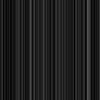

In [39]:
## Converting images from the data row
from PIL import Image 
images = np.transpose(df_q_col_bases).apply(lambda x: Image.fromarray(x.values.reshape(1, 9044), 'L').resize((100, 100)), axis=1)

# show image 0
images[0]

In [ ]:
# text = text.casefold()  # Lowercase all text casefold() is the more agressive unicode support version of lower()
# text = contractions.fix(text) # Expand all contractions 
# text = re.sub(r"\S+\.htm", "", text) # Remove tokens ending in .htm
# text = re.sub(r"<.*?>", " ", text) # Remove all HTML tags but keep their contents
# text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
# text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
# text = re.sub(r"https?://\S+", "", text) # Remove hyperlinks
# text = re.sub(r"\b[0-9]+\b\s*", "", text) # Remove all numbers and dates 
# text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text) # Replace duplicate words with a single instance of the word
    
# # Remove short and long tokens
# tokens = text.split()
# clean_tokens = [t for t in tokens if len(t) > 1 and len(t) < 46]
# text = " ".join(clean_tokens)